In [2]:
import os,sys
from pathlib import Path 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [3]:
prec_data_folder = Path(r"C:\Users\eks510\OneDrive - Vrije Universiteit Amsterdam\2_Projects\AFD_Serbia\Data\precipitation")
prec_data = list(prec_data_folder.glob("*.nc"))

# Filter files into separate lists based on patterns
obs_rx5d_files = [file for file in prec_data if 'obs_rx5d' in file.name]
obs_rx1d_files = [file for file in prec_data if 'obs_rx1d' in file.name]
rcp85_rx1d_files = [file for file in prec_data if 'rcp85' in file.name and 'rx1d' in file.name]
rcp45_rx1d_files = [file for file in prec_data if 'rcp45' in file.name and 'rx1d' in file.name]
rcp45_rx5d_files = [file for file in prec_data if 'rcp45' in file.name and 'rx5d' in file.name]
rcp85_rx5d_files = [file for file in prec_data if 'rcp85' in file.name and 'rx5d' in file.name]

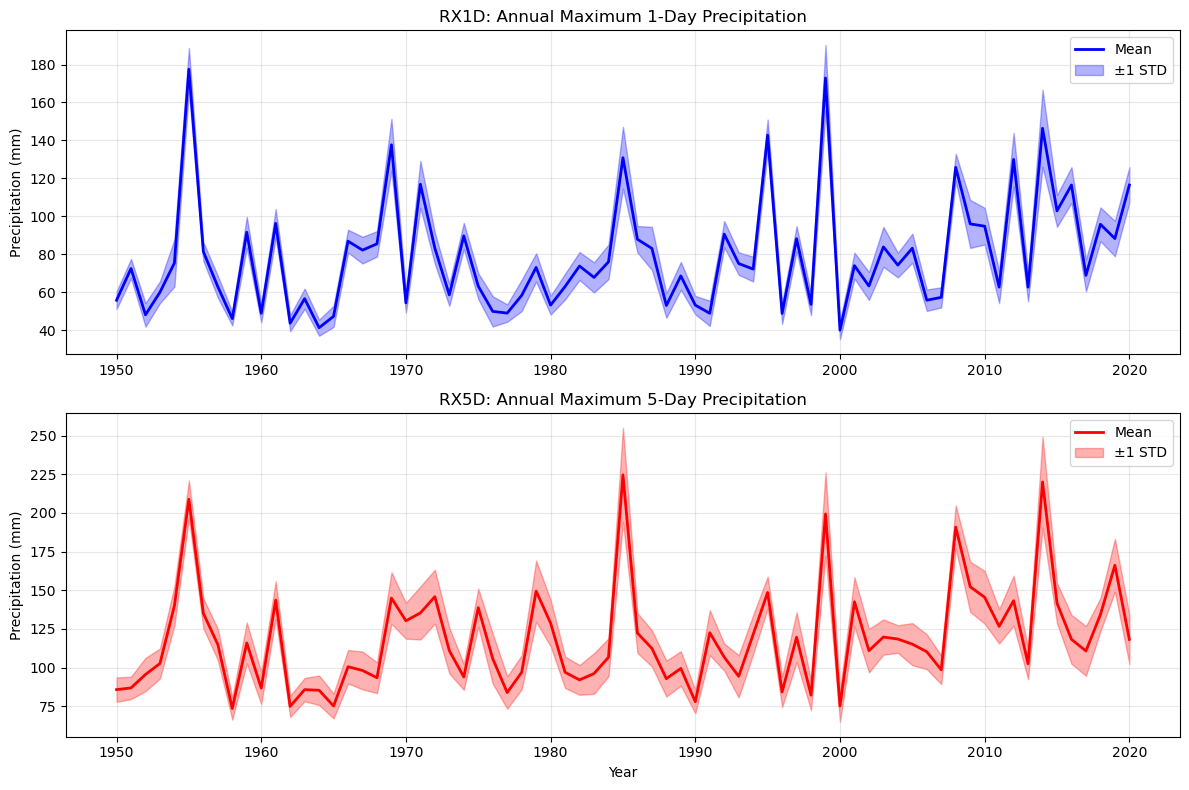

In [30]:
# Load the observational data
ds_rx1d = xr.open_dataset(obs_rx1d_files[0])
ds_rx5d = xr.open_dataset(obs_rx5d_files[0])

# Calculate annual spatial statistics
rx1d_annual_mean = ds_rx1d.groupby('time.year').max(['latitude', 'longitude'])
rx1d_annual_std = ds_rx1d.groupby('time.year').std(['latitude', 'longitude'])

rx5d_annual_mean = ds_rx5d.groupby('time.year').max(['latitude', 'longitude'])
rx5d_annual_std = ds_rx5d.groupby('time.year').std(['latitude', 'longitude'])

# Extract years from the time coordinate
years = rx1d_annual_mean.time.dt.year.values
rx1d_mean = rx1d_annual_mean['rx1d'].values
rx1d_std = rx1d_annual_std['rx1d'].values
rx5d_mean = rx5d_annual_mean['rx5d'].values
rx5d_std = rx5d_annual_std['rx5d'].values

# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# RX1D plot
ax1.plot(years, rx1d_mean, 'b-', linewidth=2, label='Mean')
ax1.fill_between(years, rx1d_mean - rx1d_std, rx1d_mean + rx1d_std, 
                 alpha=0.3, color='blue', label='±1 STD')
ax1.set_title('RX1D: Annual Maximum 1-Day Precipitation')
ax1.set_ylabel('Precipitation (mm)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# RX5D plot
ax2.plot(years, rx5d_mean, 'r-', linewidth=2, label='Mean')
ax2.fill_between(years, rx5d_mean - rx5d_std, rx5d_mean + rx5d_std, 
                 alpha=0.3, color='red', label='±1 STD')
ax2.set_title('RX5D: Annual Maximum 5-Day Precipitation')
ax2.set_xlabel('Year')
ax2.set_ylabel('Precipitation (mm)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

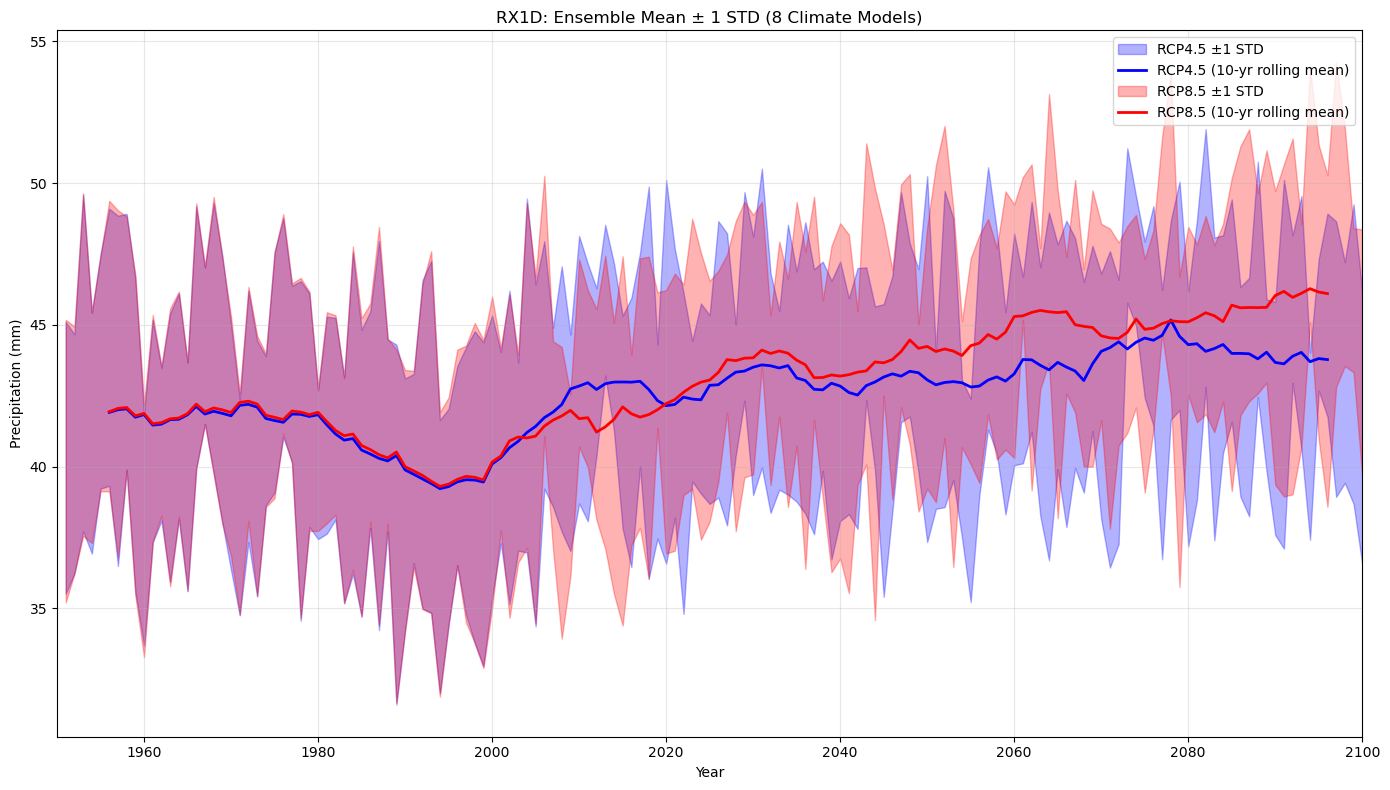

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and process RCP4.5 files
rcp45_annual_data = []
for file in rcp45_rx1d_files:
    ds = xr.open_dataset(file)
    annual_mean = ds.groupby('time.year').mean(['latitude', 'longitude'])
    rcp45_annual_data.append(annual_mean['rx1d'].values)

# Load and process RCP8.5 files
rcp85_annual_data = []
for file in rcp85_rx1d_files:
    ds = xr.open_dataset(file)
    annual_mean = ds.groupby('time.year').mean(['latitude', 'longitude'])
    rcp85_annual_data.append(annual_mean['rx1d'].values)

# Get years
ds_sample = xr.open_dataset(rcp45_rx1d_files[0])
annual_sample = ds_sample.groupby('time.year').mean(['latitude', 'longitude'])
years = annual_sample.time.dt.year.values

# Convert to numpy arrays and calculate ensemble statistics
rcp45_array = np.array(rcp45_annual_data)
rcp85_array = np.array(rcp85_annual_data)

rcp45_mean = np.mean(rcp45_array, axis=0)
rcp45_std = np.std(rcp45_array, axis=0)
rcp85_mean = np.mean(rcp85_array, axis=0)
rcp85_std = np.std(rcp85_array, axis=0)

# Apply rolling average (10-year window)
window = 10
rcp45_smooth = pd.Series(rcp45_mean).rolling(window=window, center=True).mean()
rcp85_smooth = pd.Series(rcp85_mean).rolling(window=window, center=True).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot RCP4.5
ax.fill_between(years, rcp45_mean - rcp45_std, rcp45_mean + rcp45_std, 
                alpha=0.3, color='blue', label='RCP4.5 ±1 STD')
ax.plot(years, rcp45_smooth, 'b-', linewidth=2, label=f'RCP4.5 ({window}-yr rolling mean)')

# Plot RCP8.5
ax.fill_between(years, rcp85_mean - rcp85_std, rcp85_mean + rcp85_std, 
                alpha=0.3, color='red', label='RCP8.5 ±1 STD')
ax.plot(years, rcp85_smooth, 'r-', linewidth=2, label=f'RCP8.5 ({window}-yr rolling mean)')

# Customize plot
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('RX1D: Ensemble Mean ± 1 STD (8 Climate Models)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(1950, 2100)

plt.tight_layout()
plt.show()

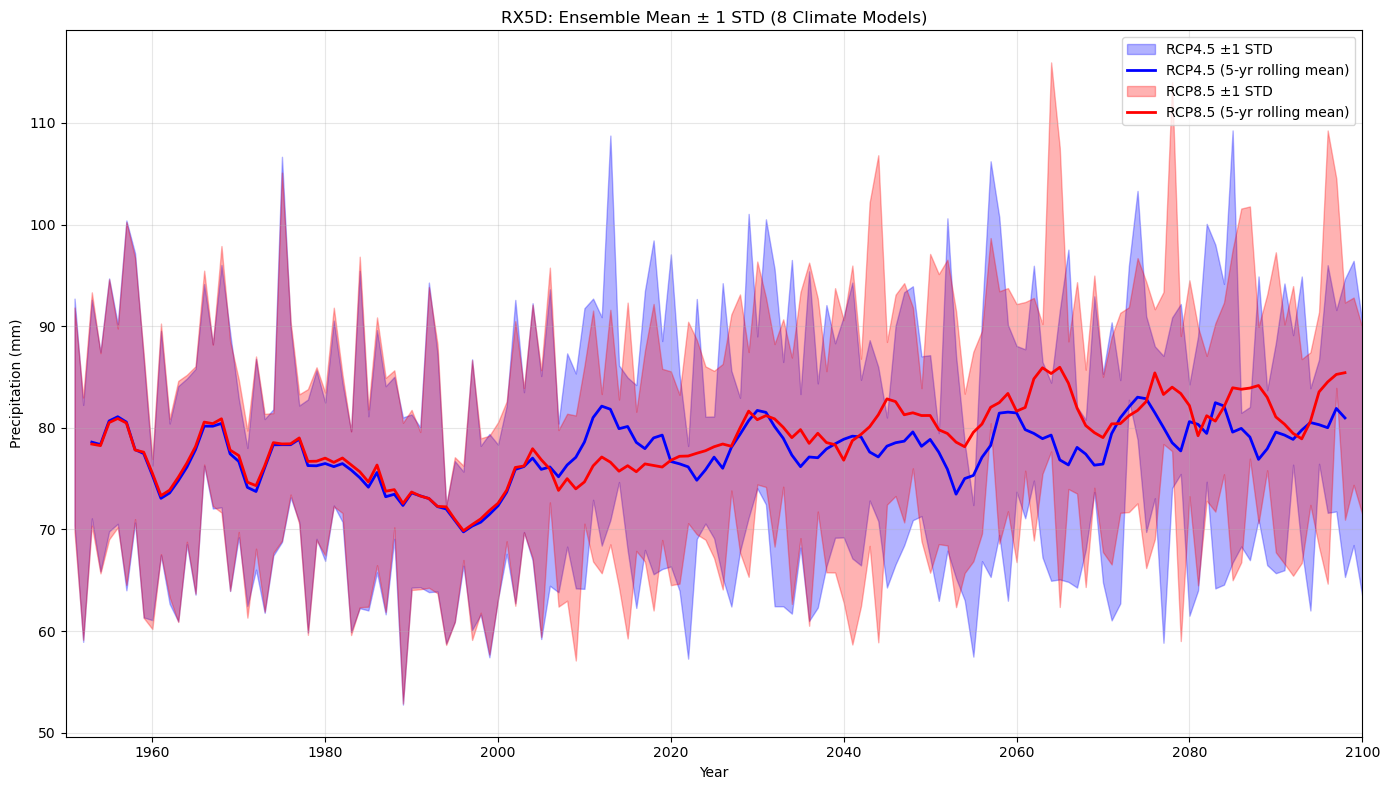

In [28]:
# Load and process RCP4.5 rx5d files
rcp45_annual_data = []
for file in rcp45_rx5d_files:
    ds = xr.open_dataset(file)
    annual_mean = ds.groupby('time.year').mean(['latitude', 'longitude'])
    rcp45_annual_data.append(annual_mean['rx5d'].values)

# Load and process RCP8.5 rx5d files
rcp85_annual_data = []
for file in rcp85_rx5d_files:
    ds = xr.open_dataset(file)
    annual_mean = ds.groupby('time.year').mean(['latitude', 'longitude'])
    rcp85_annual_data.append(annual_mean['rx5d'].values)

# Get years
ds_sample = xr.open_dataset(rcp45_rx5d_files[0])
annual_sample = ds_sample.groupby('time.year').mean(['latitude', 'longitude'])
years = annual_sample.time.dt.year.values

# Convert to numpy arrays and calculate ensemble statistics
rcp45_array = np.array(rcp45_annual_data)
rcp85_array = np.array(rcp85_annual_data)

rcp45_mean = np.mean(rcp45_array, axis=0)
rcp45_std = np.std(rcp45_array, axis=0)
rcp85_mean = np.mean(rcp85_array, axis=0)
rcp85_std = np.std(rcp85_array, axis=0)

# Apply rolling average (10-year window)
window = 5
rcp45_smooth = pd.Series(rcp45_mean).rolling(window=window, center=True).mean()
rcp85_smooth = pd.Series(rcp85_mean).rolling(window=window, center=True).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot RCP4.5
ax.fill_between(years, rcp45_mean - rcp45_std, rcp45_mean + rcp45_std, 
                alpha=0.3, color='blue', label='RCP4.5 ±1 STD')
ax.plot(years, rcp45_smooth, 'b-', linewidth=2, label=f'RCP4.5 ({window}-yr rolling mean)')

# Plot RCP8.5
ax.fill_between(years, rcp85_mean - rcp85_std, rcp85_mean + rcp85_std, 
                alpha=0.3, color='red', label='RCP8.5 ±1 STD')
ax.plot(years, rcp85_smooth, 'r-', linewidth=2, label=f'RCP8.5 ({window}-yr rolling mean)')

# Customize plot
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('RX5D: Ensemble Mean ± 1 STD (8 Climate Models)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(1950, 2100)

plt.tight_layout()
plt.show()

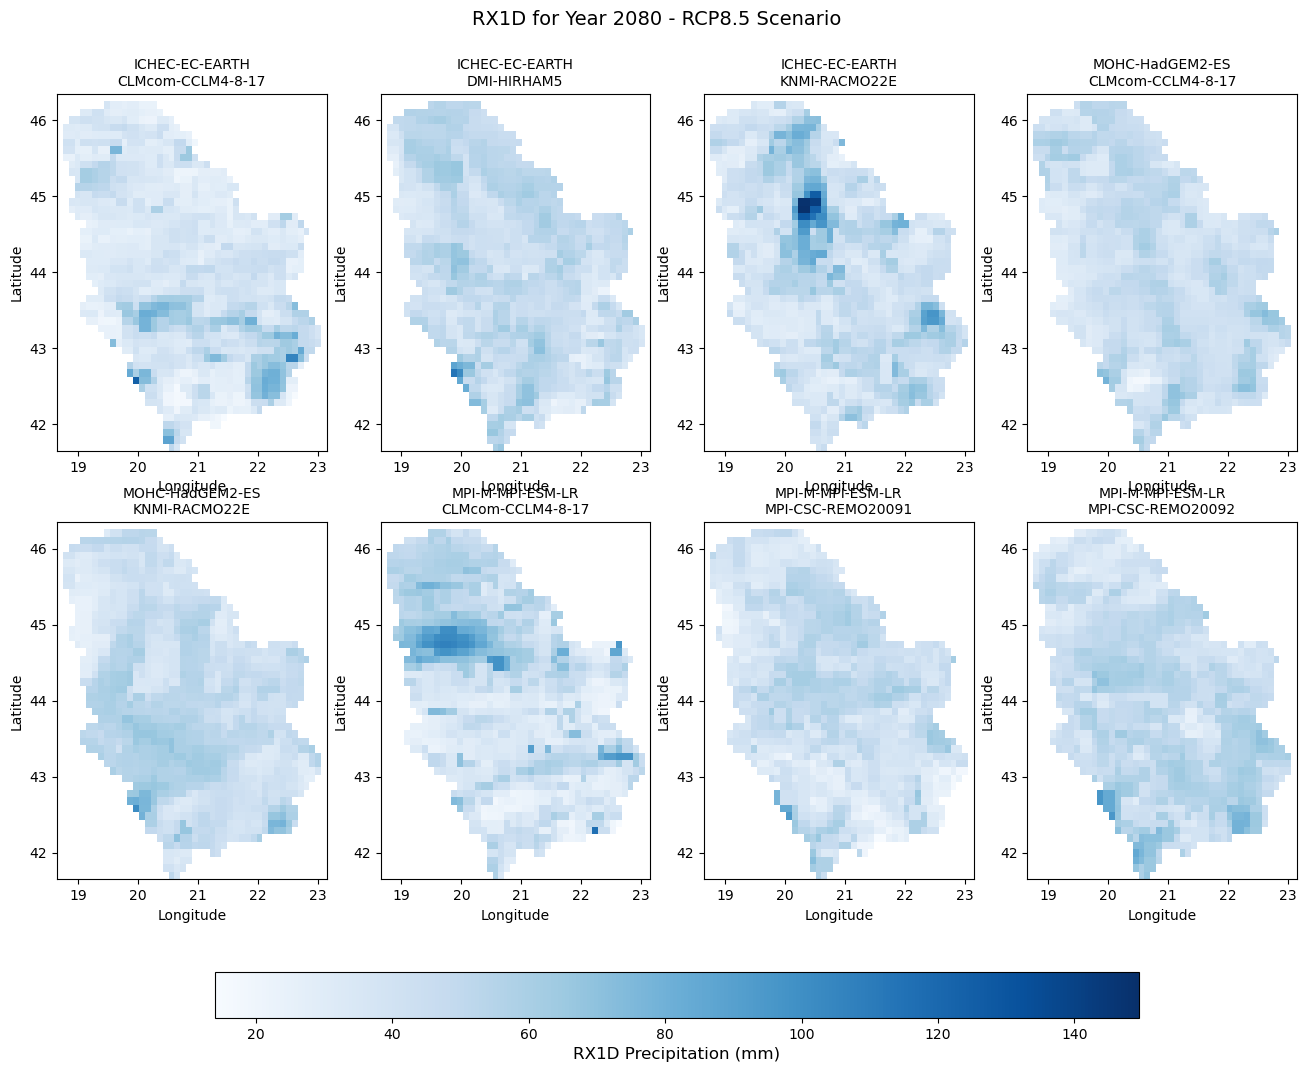

In [41]:
import matplotlib.pyplot as plt

# Select year and scenario
target_year = 2080
scenario_files = rcp85_rx1d_files  # Using RCP8.5, change to rcp45_rx1d_files if preferred

# Load data for target year from each model
model_data = []
model_names = []

for file in scenario_files:
    ds = xr.open_dataset(file)
    # Extract year 2080
    year_data = ds.sel(time=ds.time.dt.year == target_year)
    
    # Get model name from filename
    model_name = file.name.split('gcm-')[1].split('-rcm-')[0] + '\n' + file.name.split('-rcm-')[1].split('.nc')[0]
    
    model_data.append(year_data['rx1d'].squeeze())
    model_names.append(model_name)

# Create multi-panel plot
n_models = len(model_data)
n_cols = 4
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten() if n_models > 1 else [axes]

# Get coordinate arrays
lons = model_data[0].longitude.values
lats = model_data[0].latitude.values

# Find common color scale
vmin = min([data.min().values for data in model_data])
vmax = max([data.max().values for data in model_data])

for i, (data, name) in enumerate(zip(model_data, model_names)):
    ax = axes[i]
    
    # Create map using imshow
    im = ax.imshow(data.values, cmap='Blues', vmin=vmin, vmax=vmax, 
                   extent=[lons.min(), lons.max(), lats.min(), lats.max()], 
                   origin='lower', aspect='auto')
    
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Remove empty subplots
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

# Add colorbar
cbar = fig.colorbar(im, ax=axes[:n_models], orientation='horizontal', 
                   fraction=0.05, pad=0.1, shrink=0.8)
cbar.set_label('RX1D Precipitation (mm)', fontsize=12)

plt.suptitle(f'RX1D for Year {target_year} - RCP8.5 Scenario', fontsize=14, y=0.95)
plt.show()

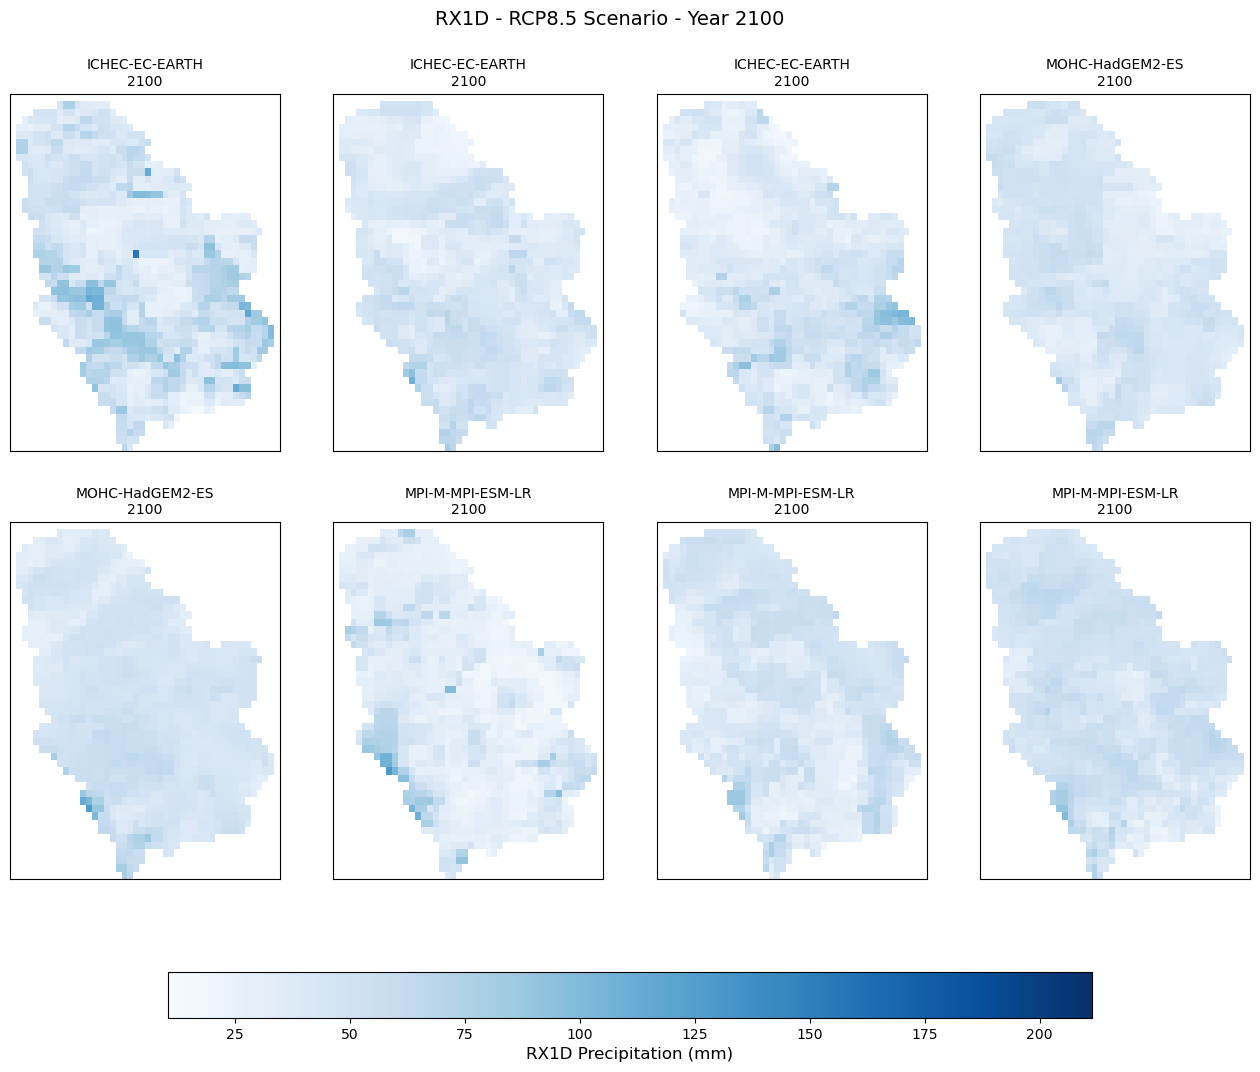

In [44]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Select scenario and year range
scenario_files = rcp85_rx1d_files
start_year = 2030
end_year = 2100

# Load all model datasets
model_datasets = []
model_names = []

for file in scenario_files:
    ds = xr.open_dataset(file)
    # Filter to our year range
    ds_filtered = ds.sel(time=ds.time.dt.year.isin(range(start_year, end_year + 1)))
    
    # Get model name from filename - simplified
    model_name = file.name.split('gcm-')[1].split('-rcm-')[0]
    
    model_datasets.append(ds_filtered)
    model_names.append(model_name)

# Get coordinate arrays and years
lons = model_datasets[0].longitude.values
lats = model_datasets[0].latitude.values
years = model_datasets[0].time.dt.year.values

# Find global color scale across all data
vmin = float('inf')
vmax = float('-inf')

for ds in model_datasets:
    data_min = ds['rx1d'].min().values
    data_max = ds['rx1d'].max().values
    vmin = min(vmin, data_min)
    vmax = max(vmax, data_max)

# Create multi-panel plot
n_models = len(model_datasets)
n_cols = 4
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten() if n_models > 1 else [axes]

# Create initial plots
im_plots = []
for i in range(n_models):
    ax = axes[i]
    
    # Initial data (first year) - keep as 2D
    initial_data = model_datasets[i]['rx1d'].isel(time=0).values
    
    im = ax.imshow(initial_data, cmap='Blues', vmin=vmin, vmax=vmax, 
                   extent=[lons.min(), lons.max(), lats.min(), lats.max()], 
                   origin='lower', aspect='auto')
    
    ax.set_title(f"{model_names[i]}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
    im_plots.append(im)

# Remove empty subplots
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

# Add colorbar
cbar = fig.colorbar(im_plots[0], ax=axes[:n_models], orientation='horizontal', 
                   fraction=0.05, pad=0.1, shrink=0.8)
cbar.set_label('RX1D Precipitation (mm)', fontsize=12)

def animate(frame):
    current_year = years[frame]
    
    # Update each subplot
    for i in range(n_models):
        data = model_datasets[i]['rx1d'].isel(time=frame).values  # Keep as 2D
        im_plots[i].set_data(data)  # Use set_data instead of set_array
        axes[i].set_title(f"{model_names[i]}\n{current_year}", fontsize=10)
    
    # Update main title
    fig.suptitle(f'RX1D - RCP8.5 Scenario - Year {current_year}', fontsize=14, y=0.95)
    
    return im_plots

# Create animation - turn off blitting since we're updating titles
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(years),
    interval=300,
    blit=False  # Changed to False since we're updating titles
)

# Save animation
ani.save('rx1d_rcp85_2030-2100.gif', 
         writer="pillow", 
         savefig_kwargs={'facecolor': 'white', 'pad_inches': 0.1})

plt.show()

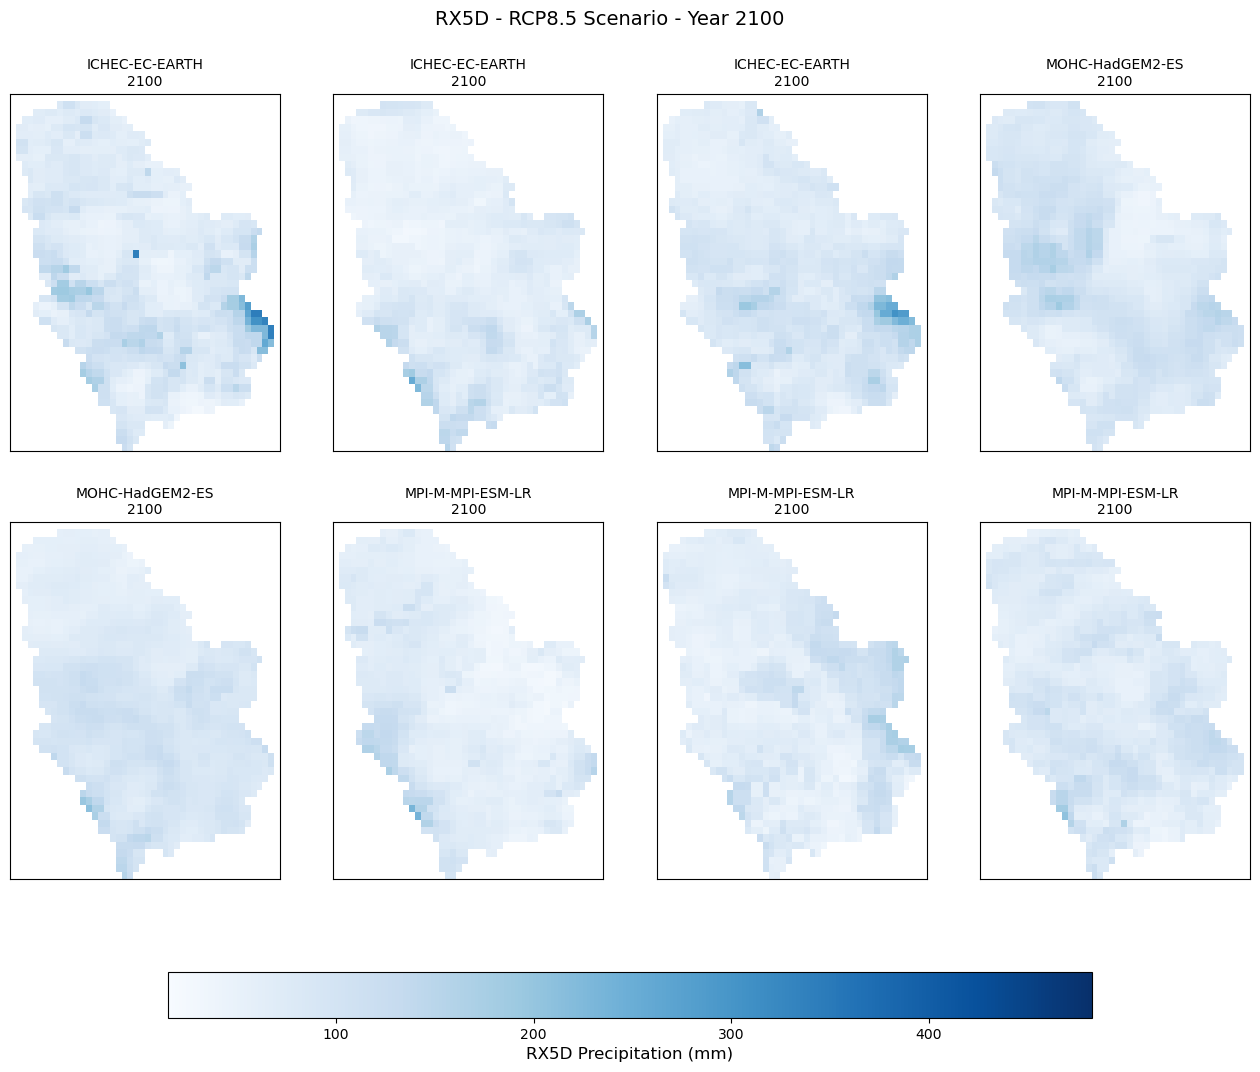

In [46]:
scenario_files = rcp85_rx5d_files  # Using RCP8.5
start_year = 2030
end_year = 2100

# Load all model datasets
model_datasets = []
model_names = []

for file in scenario_files:
    ds = xr.open_dataset(file)
    # Filter to our year range
    ds_filtered = ds.sel(time=ds.time.dt.year.isin(range(start_year, end_year + 1)))
    
    # Get model name from filename - simplified
    model_name = file.name.split('gcm-')[1].split('-rcm-')[0]
    
    model_datasets.append(ds_filtered)
    model_names.append(model_name)

# Get coordinate arrays and years
lons = model_datasets[0].longitude.values
lats = model_datasets[0].latitude.values
years = model_datasets[0].time.dt.year.values

# Find global color scale across all data
vmin = float('inf')
vmax = float('-inf')

for ds in model_datasets:
    data_min = ds['rx5d'].min().values
    data_max = ds['rx5d'].max().values
    vmin = min(vmin, data_min)
    vmax = max(vmax, data_max)

# Create multi-panel plot
n_models = len(model_datasets)
n_cols = 4
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten() if n_models > 1 else [axes]

# Create initial plots
im_plots = []
for i in range(n_models):
    ax = axes[i]
    
    # Initial data (first year) - keep as 2D
    initial_data = model_datasets[i]['rx5d'].isel(time=0).values
    
    im = ax.imshow(initial_data, cmap='Blues', vmin=vmin, vmax=vmax, 
                   extent=[lons.min(), lons.max(), lats.min(), lats.max()], 
                   origin='lower', aspect='auto')
    
    ax.set_title(f"{model_names[i]}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
    im_plots.append(im)

# Remove empty subplots
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

# Add colorbar
cbar = fig.colorbar(im_plots[0], ax=axes[:n_models], orientation='horizontal', 
                   fraction=0.05, pad=0.1, shrink=0.8)
cbar.set_label('RX5D Precipitation (mm)', fontsize=12)

def animate(frame):
    current_year = years[frame]
    
    # Update each subplot
    for i in range(n_models):
        data = model_datasets[i]['rx5d'].isel(time=frame).values  # Keep as 2D
        im_plots[i].set_data(data)  # Use set_data instead of set_array
        axes[i].set_title(f"{model_names[i]}\n{current_year}", fontsize=10)
    
    # Update main title
    fig.suptitle(f'RX5D - RCP8.5 Scenario - Year {current_year}', fontsize=14, y=0.95)
    
    return im_plots

# Create animation
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(years),
    interval=300,
    blit=False
)

# Save animation
ani.save('rx5d_rcp85_2030-2100.gif', 
         writer="pillow", 
         savefig_kwargs={'facecolor': 'white', 'pad_inches': 0.1})

plt.show()